[0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1
 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0]


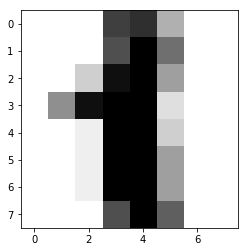

In [4]:
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional
from torch.utils.data import TensorDataset, DataLoader, random_split
%matplotlib inline

X, y = ds.load_digits(n_class=2, return_X_y=True)
plt.imshow(X[1].reshape((8, 8)), cmap='binary')
l = len(X)
print(y)


In [6]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  
device = torch.device(dev) 
X = torch.LongTensor(X)
X.to(device)
y = torch.LongTensor(y)
print(X)
y.to(device)
data = TensorDataset(X, y)
print(data)
train_data, test_data, val_data = random_split(data, [int(l * 0.7), int(l * 0.2), l - int(l * 0.7) - int(l * 0.2)])


tensor([[ 0,  0,  5,  ...,  0,  0,  0],
        [ 0,  0,  0,  ..., 10,  0,  0],
        [ 0,  0,  1,  ...,  3,  0,  0],
        ...,
        [ 0,  0,  5,  ...,  8,  1,  0],
        [ 0,  0,  6,  ...,  4,  0,  0],
        [ 0,  0,  6,  ...,  6,  0,  0]])


In [187]:
class Lin(torch.nn.Module):
    def __init__(self, input):
        super(Lin, self).__init__()
        self.linear = nn.Linear(input, 2)

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out


input = 8 * 8
#output = 2
model = Lin(input).to(device)


In [191]:
def Validate(model, val_data):
    val_loader = DataLoader(dataset=val_data, batch_size=10, shuffle=True)
    model = model.eval()
    correct = 0
    total = 0
    for X_batch, y_batch in val_loader:
        y_pred = model(X_batch.float())
        total += y_batch.size(0)
        correct += (y_pred.argmax(1) == y_batch).sum().item()
    return correct / total


In [192]:
def train_model(model, train_data, val_data, max_epochs=100):
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
    loss = nn.CrossEntropyLoss()
    train_loader = DataLoader(dataset=train_data, batch_size=20, shuffle=True)
    for epoch in range(max_epochs):
        correct = 0
        total = 0
        for X_batch, y_batch in train_loader:
            model = model.train()
            y_pred = model(X_batch.float())
            loss1 = loss(y_pred, y_batch)
            total += y_batch.size(0)
            correct += (y_pred.argmax(1) == y_batch).sum().item()
            loss1.backward()
            optimizer.step()
            optimizer.zero_grad()
        if epoch % 3 == 2:
            acc = correct / total
            print(f'Epoch = {epoch}, acc = {acc}, loss = {loss1}')
            print(f'VAL:  Epoch = {epoch},acc ={Validate(model,val_data)} ')
train_model(model, train_data, val_data)


Epoch = 2, acc = 0.9960159362549801, loss = 0.3366512954235077
VAL:  Epoch = 2,acc =0.972972972972973 
Epoch = 5, acc = 0.9960159362549801, loss = 0.3255610466003418
VAL:  Epoch = 5,acc =1.0 
Epoch = 8, acc = 0.9960159362549801, loss = 0.31664884090423584
VAL:  Epoch = 8,acc =1.0 
Epoch = 11, acc = 1.0, loss = 0.3150291442871094
VAL:  Epoch = 11,acc =1.0 
Epoch = 14, acc = 1.0, loss = 0.32689106464385986
VAL:  Epoch = 14,acc =1.0 
Epoch = 17, acc = 1.0, loss = 0.31632864475250244
VAL:  Epoch = 17,acc =1.0 
Epoch = 20, acc = 1.0, loss = 0.31540095806121826
VAL:  Epoch = 20,acc =1.0 
Epoch = 23, acc = 1.0, loss = 0.31589338183403015
VAL:  Epoch = 23,acc =1.0 
Epoch = 26, acc = 1.0, loss = 0.31505441665649414
VAL:  Epoch = 26,acc =1.0 
Epoch = 29, acc = 1.0, loss = 0.31404727697372437
VAL:  Epoch = 29,acc =1.0 
Epoch = 32, acc = 1.0, loss = 0.31397661566734314
VAL:  Epoch = 32,acc =1.0 
Epoch = 35, acc = 1.0, loss = 0.31388089060783386
VAL:  Epoch = 35,acc =1.0 
Epoch = 38, acc = 1.0, los